In [1]:
import numpy as np
from scipy.optimize import minimize

In [28]:
import matplotlib.pyplot as plt
plt.style.use('grayscale')

In [2]:
def log_likelihood(params, data):
    mu, T = params
    if mu <= 0 or T <= 0:
        return np.inf  # Penalize invalid parameter values
    
    log_likelihood_sum = 0
    for w in data:
        likelihood = (np.exp(-mu * w) * (np.exp(mu * T) - 1)) / T
        if likelihood <= 0:
            return np.inf  # Avoid log of zero or negative values
        log_likelihood_sum += np.log(likelihood)
    
    return -log_likelihood_sum  # Minimize negative log-likelihood

In [8]:
np.log((np.exp(true_mu * true_T)-1)/true_T)

0.8049116038238614

In [13]:
def new_log_likelihood(params, data):
    mu, T = params
    if mu <= 0 or T <= 0:
        return np.inf  # Penalize invalid parameter values

    log_likelihood_sum = len(data)*np.log((np.exp(mu * T)-1)/T) - mu*sum(data)
    return -log_likelihood_sum

In [10]:
def estimate_parameters(data):
    initial_guess = [1.0, np.mean(data)]  # Initial guess for mu and T
    bounds = [(1e-6, None), (1e-6, None)]  # Ensure positive values
    result = minimize(new_log_likelihood, initial_guess, args=(data,), bounds=bounds)
    return result.x if result.success else (None, None)

In [25]:
# Example usage with synthetic data
np.random.seed(42)
n_samples = 10000
true_mu = 0.5
true_T = 5.0
exponential_data = np.random.exponential(1 / true_mu, size=n_samples) 
data = exponential_data + np.random.uniform(0, true_T, size=n_samples)

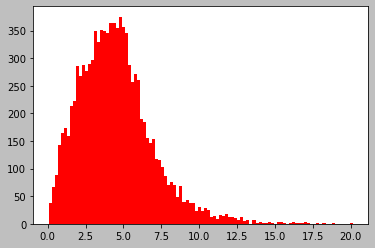

In [29]:
plt.hist(data, color='red', bins=100)
# plt.hist(exponential_data, color = 'blue', bins = 100)
plt.show()

In [30]:
# Estimate mu and T
estimated_mu, estimated_T = estimate_parameters(data)
if estimated_mu is not None and estimated_T is not None:
    print(f"Estimated mu: {estimated_mu:.4f}, Estimated T: {estimated_T:.4f}")
else:
    print("Optimization failed. Could not estimate parameters.")

Optimization failed. Could not estimate parameters.


C:\Users\Rohan Bapat\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rohan Bapat\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [ ]:
def MLE_Norm(parameters):
    # extract parameters
    const, beta, std_dev = parameters
    # predict the output
    pred = const + beta*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 